In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
from cobra.io import read_sbml_model
#make sure model name is up to date!
model = read_sbml_model('iCW773_test7_psilocybin.xml')

No objective coefficients in model. Unclear what should be optimized


In [3]:
model.compartments #this is the right model

{'c': '', 'e': ''}

In [4]:
model.metabolites.psi_c #this is our product

Metabolite identifier,psi_c
Name,Psilocybin
Memory address,0x01520f034fd0
Formula,C12H17N2O4P
Compartment,c
In 4 reaction(s),"DM_psi_c, psiK2, psiM2, pho"


In [5]:
model.reactions.psiK2 #this is the reaction that makes our product

Reaction identifier,psiK2
Name,
Memory address,0x01520f91e550
Stoichiometry,atp_c + psii_c --> adp_c + psi_c ATP + psilocin --> ADP + Psilocybin
GPR,
Lower bound,0.0
Upper bound,1000.0


## Optimization

In [6]:
#to set optimization (this is the production of psilocybin from the precursor)
with model:
    model.objective = model.reactions.psiK2
    print(model.optimize().objective_value)

5.57043656605489


In [7]:
#print(model.objective)

In [8]:
model.medium

{'EX_ca2_e': 0.0144877134286247,
 'EX_cobalt2_e': 7.00338234344926e-05,
 'EX_cu2_e': 0.00197271722237563,
 'EX_fe2_e': 0.16239125,
 'EX_fe3_e': 0.0217300637039616,
 'EX_glc_e': 4.67,
 'EX_k_e': 0.543285250115532,
 'EX_mg2_e': 0.0241459221505149,
 'EX_mn2_e': 0.00192443552016793,
 'EX_nh4_e': 11.9121416666662,
 'EX_ni2_e': 0.00089824250292982,
 'EX_o2_e': 16.5067783333334,
 'EX_pi_e': 0.918000000000888,
 'EX_so4_e': 4.01673156249995,
 'EX_zn2_e': 0.000948926279874219,
 'EX_BIOTIN': 1.01925397503027e-06,
 'EX_cl': 0.0144877134286247}

In [9]:
medium = model.medium
with model:
    medium['EX_glc_e'] = 10
    model.medium = medium
    model.objective = model.reactions.psiK2
    psi_production = model.optimize().objective_value
## Phenotypic phase plane analysis    print("Theoretical max. yield [mmol-psi / mmol-gl]:", psi_production / (-1*model.reactions.EX_glc_e.flux)) #these units also need review

In [10]:
medium = model.medium
with model:
    medium['EX_glc_e'] = 10
    model.medium = medium
    psi_production = model.optimize().objective_value
    print("Max. psi production [mmol gDW^-1 h^-1]:", psi_production) #these units need review #########
    print("Theoretical max. yield [mmol-psi / mmol-gl]:", psi_production / (-1*model.reactions.EX_glc_e.flux)) #these units also need review

Max. psi production [mmol gDW^-1 h^-1]: 0.0
Theoretical max. yield [mmol-psi / mmol-gl]: 0.0


## Phenotypic phase plane analysis

In [11]:
model.reactions.query('biomass','name')

[<Reaction CG_biomass_cgl_ATCC13032 at 0x1520f244668>,
 <Reaction EX_biomass at 0x1520f76d588>]

In [12]:
#maybe add some other carbon source here
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [13]:
#i don't think it likes decimals

In [14]:
model.reactions.CG_biomass_cgl_ATCC13032

Reaction identifier,CG_biomass_cgl_ATCC13032
Name,cgl biomass objective function (ATCC13032)
Memory address,0x01520f244668
Stoichiometry,0.098705 arabino_c + 47.7 atp_c + 0.01039 dna_c + 47.7 h2o_c + 0.062224 ions_c + 0.10598 mycoli_c + 0.098705 peptid_c + 0.029092 phosph_c + 0.54028 protein_c + 0.05195 rna_c + 0.002679... 0.098705 arabino + 47.7 ATP + 0.01039 DNA + 47.7 H2O + 0.062224 ions + 0.10598 mycoli + 0.098705 peptid + 0.029092 phosph + 0.54028 protein + 0.05195 rna + 0.002679 soluble_pool --> 47.7 ADP +...
GPR,
Lower bound,0.0
Upper bound,0.428929662134894


In [15]:
model.reactions.query('o2','id')

[<Reaction EX_co2_e at 0x1520f43e390>,
 <Reaction EX_no2_e at 0x1520f466a90>,
 <Reaction EX_o2_e at 0x1520f466b38>,
 <Reaction EX_o2s_e at 0x1520f466c18>]

In [16]:
ppp_psi_gluc = production_envelope(model,
                reactions=[model.reactions.EX_glc_e],
                objective=[model.reactions.psiK2])

<AxesSubplot:xlabel='EX_glc_e'>

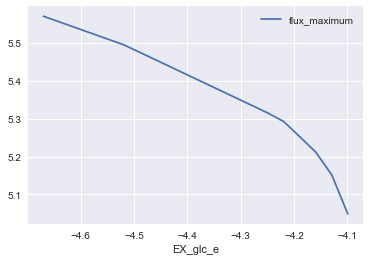

In [17]:
ppp_psi_gluc.plot(x='EX_glc_e', y='flux_maximum')

In [18]:
ppp_psi2_oxy = production_envelope(model,
                reactions=[model.reactions.EX_o2_e],
                objective=[model.reactions.psiK2])

<AxesSubplot:xlabel='EX_o2_e'>

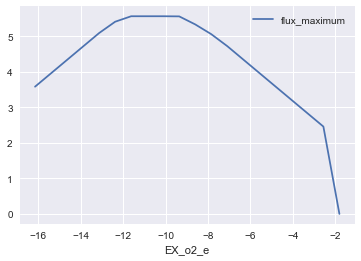

In [19]:
ppp_psi2_oxy.plot(x='EX_o2_e', y='flux_maximum')

In [20]:
ppp_bio = production_envelope(model,
                reactions=[model.reactions.psiK2],
                carbon_sources=[model.reactions.EX_glc_e],
                objective=[model.reactions.CG_biomass_cgl_ATCC13032])

C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 26.227799999999995 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 47.309599999999996 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 21.0818 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packages\cobra\core\metabolite.py:104: UserWarning: 1.809384 is not an integer (in formula O1.809384S0.452346Fe1.514453Ca0.542815Co0.002624Cu0.073913K20.35556Mg0.904692Mn0.072104Ni0.033655Zn0.035554Cl0.542815)
  % (count, self.formula)
C:\Users\s174916\.conda\envs\Conda2_env\lib\site-packa

In [21]:
#i actually don't think the warning matters

## Optimization

In [22]:
solution = model.optimize()

In [23]:
solution.fluxes

ALAR        0.023614
ALATA_L     0.160910
ASNN        0.000000
ASNS1       0.000000
ASNS2       0.028295
              ...   
psiK2       0.000000
psiM        0.000000
psiM2       0.000000
pho         0.000000
DM_psi_c   -0.000000
Name: fluxes, Length: 1215, dtype: float64

In [24]:
type(solution.fluxes)

pandas.core.series.Series

In [25]:
solution.fluxes.describe()

count    1215.000000
mean        0.181463
std         1.776724
min       -23.009007
25%         0.000000
50%         0.000000
75%         0.000000
max        29.971509
Name: fluxes, dtype: float64

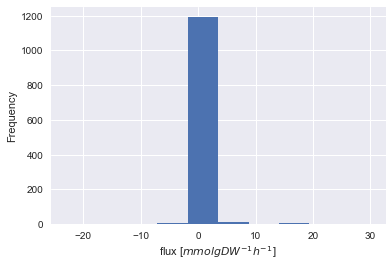

In [26]:
fig = solution.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

In [27]:
solution.fluxes[solution.fluxes != 0.]

ALAR       0.023614
ALATA_L    0.160910
ASNS2      0.028295
ASPTA     -2.302015
VPAMT      0.039972
             ...   
KARA1     -0.091457
KARA2      0.027600
OMCDC      0.051393
THRD_L     0.027600
LEUTAi     0.051393
Name: fluxes, Length: 347, dtype: float64

## Escher Plot

In [28]:
#this needs to go under optimization

In [29]:
import escher
model.optimize().objective_value

0.0

In [30]:
from cobra.io import read_sbml_model

In [31]:
from IPython.display import display 
from escher import Builder

In [32]:
escher.list_available_maps()

[{'organism': 'Saccharomyces cerevisiae',
  'map_name': 'iMM904.Central carbon metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Inositol retinol metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Glycolysis TCA PPP'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Tryptophan metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Carbohydrate metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Amino acid metabolism (partial)'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Nucleotide metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid biosynthesis (saturated)'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Nucleotide and histidine biosynthesis'},
 {'organism': 'Escherichia coli', 'map_name': 'e_coli_core.Core metabolism'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Central metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid beta-oxidation'}

In [33]:
#next: load our model

In [34]:
builder = Builder()

In [35]:
builder.map_name = 'iMM904.Central carbon metabolism'

In [36]:
from cobra.io import save_json_model
save_json_model(model, "Jens_Escher")

In [39]:
builder.model_name = ('Jens_Escher.json')

In [40]:
solution.fluxes[solution.fluxes != 0.]

ALAR       0.023614
ALATA_L    0.160910
ASNS2      0.028295
ASPTA     -2.302015
VPAMT      0.039972
             ...   
KARA1     -0.091457
KARA2      0.027600
OMCDC      0.051393
THRD_L     0.027600
LEUTAi     0.051393
Name: fluxes, Length: 347, dtype: float64

In [41]:
escher.Builder('e_coli_core.Core metabolism',
               reaction_data=solution.fluxes.to_dict())

Builder(reaction_data={'ALAR': 0.023614178991092725, 'ALATA_L': 0.16090966857457678, 'ASNN': 0.0, 'ASNS1': 0.0…